In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets
import matplotlib_inline
from IPython import display

In [2]:
display.set_matplotlib_formats("svg")
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'courier'})

/var/folders/rm/64__508935gft295b5r2v3nr0000gn/T/ipykernel_9387/3230612317.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [3]:
class MyLinearRegression(object):
    
    def __init__(self):
        pass
    
    def fit(self,X,y):
        X_b = np.hstack([np.ones((len(X),1)), X])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self,X):
        X_b = np.hstack([np.ones((len(X),1)), X])
        return X_b.dot(self._theta)

In [4]:
X, y = datasets.load_boston(return_X_y=True)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

# 自己写的线性回归模型

In [5]:
m = MyLinearRegression()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [7]:
m.fit(X_train, y_train)

In [8]:
metrics.mean_squared_error(m.predict(X_test), y_test)

20.724023437339127

# sklearn 线性回归模型

In [9]:
m = linear_model.LinearRegression()

In [10]:
m.fit(X_train, y_train)

LinearRegression()

In [11]:
metrics.mean_squared_error(m.predict(X_test), y_test)

20.724023437339643

# 自定义数据集进行测试

In [12]:
x = np.linspace(0, 5, 100)
y = 2 * x + 1 + np.random.randn(x.shape[0])

In [13]:
m = MyLinearRegression()
m.fit(x.reshape(-1, 1), y)

In [14]:
m._theta

array([1.09053319, 1.99602614])

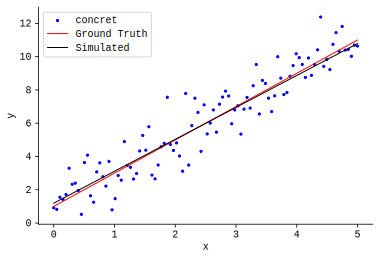

In [15]:
ax = plt.axes()
ax.spines['top'].set_visible(False) # 设置是否可视
ax.spines['right'].set_visible(False) # 其他的有left bottom
plt.scatter(x, y, s=5, color="b", label="concret")
plt.plot(x, 2 * x + 1, color="red", label="Ground Truth", lw=1)
plt.plot(x, 1.91896281 * x + 1.1939963, color="black", label="Simulated", lw=1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()